In [ ]:
# Uncomment the line below to install dependencies
%pip install -r requirements.txt

In [468]:
# Add talking points for 

import pandas as pd
import numpy as np
import seaborn as sns   
from scipy.stats import zscore

import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor

#### Part 1: Data Preparation and Problem Framing

##### Objective:
Develop a predictive model that estimates a patient’s risk of diabetes progression based on baseline clinical features. This model will be used as a screening tool to assist physicians in identifying high-risk patients for early intervention

##### Data Source - Diabetes dataset
The project uses the Diabetes Dataset from sklearn.datasets.

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

Number of Instances: 442

Number of Attributes: First 10 columns are numeric predictive values

Target: Column 11 is a quantitative measure of disease progression one year after baseline

Attribute Information:
    
    - age (age in years)
    - sex
    - bmi body mass index
    - bp average blood pressure
    - s1 tc, total serum cholesterol
    - s2 ldl, low-density lipoproteins
    - s3 hdl, high-density lipoproteins
    - s4 tch, total cholesterol / HDL
    - s5 ltg, possibly log of serum triglycerides level
    - s6 glu, blood sugar level

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).

##### Problem Statement
Early identification of patients at high risk of diabetes progression is essential for timely intervention and improved health outcomes. However, traditional screening methods may not effectively capture subtle patterns in patient data. This project aims to develop a predictive model that accurately estimates the risk of diabetes progression using clinical and physiological features. The model will serve as a decision-support tool to assist physicians in identifying at-risk individuals and prioritizing preventive care.

##### Hypothesis
    - H₀ (Null Hypothesis): There is no significant relationship between the patient’s baseline clinical features and diabetes progression.
    - H₁ (Alternative Hypothesis): Patient features such as BMI, blood pressure, and serum measurements are significant predictors of diabetes progression.

We expect that certain factors—particularly BMI, glucose-related serum levels, and blood pressure—will have the strongest correlation with disease progression.


##### Final Deliverable

A machine learning model that:
Predicts diabetes progression scores based on patient's data(features).

Identifies key risk factors driving disease progression.

Provides explainable outputs to help physicians screen and prioritize at-risk patients.


In [469]:
# 1. Load the dataset
diabetes_data = load_diabetes()

diabetes_df = load_diabetes(return_X_y=False, as_frame=True, scaled=True).frame

# diabetes_df_not_scaled = load_diabetes(return_X_y=False, as_frame=True, scaled=False).frame

# The target represents a quantitative measure of disease progression one year after baseline — a continuous numeric value.
diabetes_df["disease_progression"] = diabetes_data.target

# 2. Frame the problem -> The problem statement is in the markdown cell above

# Features (X): all other medical predictors except target (disease_progression)
X = diabetes_df.drop(columns=["disease_progression", "target"])
# Target variable (y): disease progression one year after baseline (target)
y = diabetes_df["disease_progression"]           

# Correlation of features with target
correlations = diabetes_df.corr()["disease_progression"].sort_values(ascending=False)
print("\nCorrelation of each feature with disease progression: \n", correlations)

# 3. Exploratory Data Analysis (EDA) - shapes and info
print("Shape of dataset: ", diabetes_df.shape)
print("Shape of X (features): ", X.shape)
print("Shape of y (target): ", y.shape)

# print("Dataset columns: ", diabetes_df.columns)
print("Dataset info: \n", diabetes_df.info())
diabetes_df.describe().T
# display(diabetes_df.head())




Correlation of each feature with disease progression: 
 disease_progression    1.000000
target                 1.000000
bmi                    0.586450
s5                     0.565883
bp                     0.441482
s4                     0.430453
s6                     0.382483
s1                     0.212022
age                    0.187889
s2                     0.174054
sex                    0.043062
s3                    -0.394789
Name: disease_progression, dtype: float64
Shape of dataset:  (442, 12)
Shape of X (features):  (442, 10)
Shape of y (target):  (442,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  442 non-null    float64
 1   sex                  442 non-null    float64
 2   bmi                  442 non-null    float64
 3   bp                   442 non-null    float64
 4   s1             

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


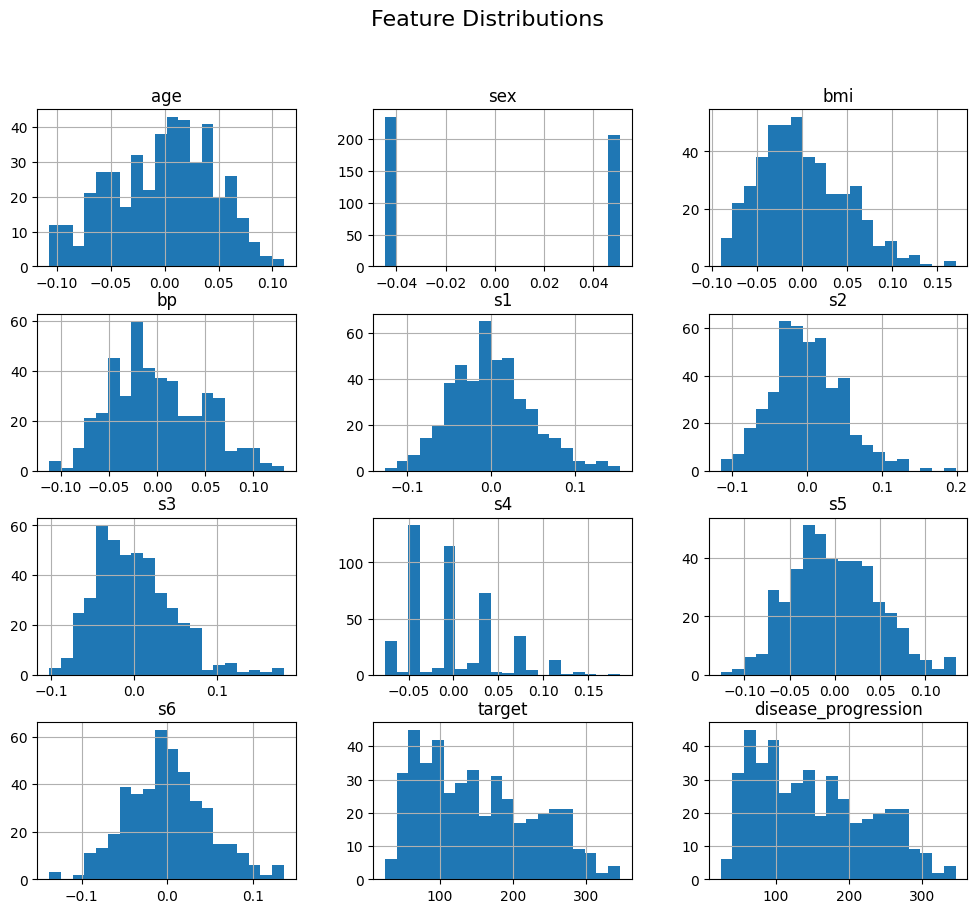

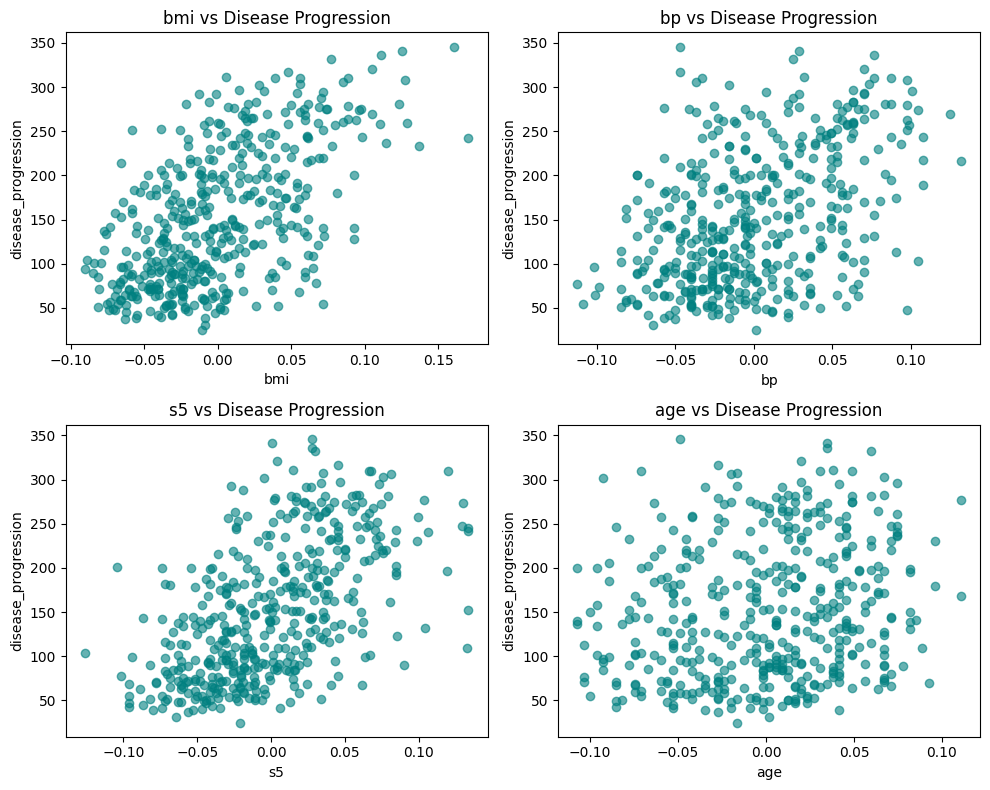

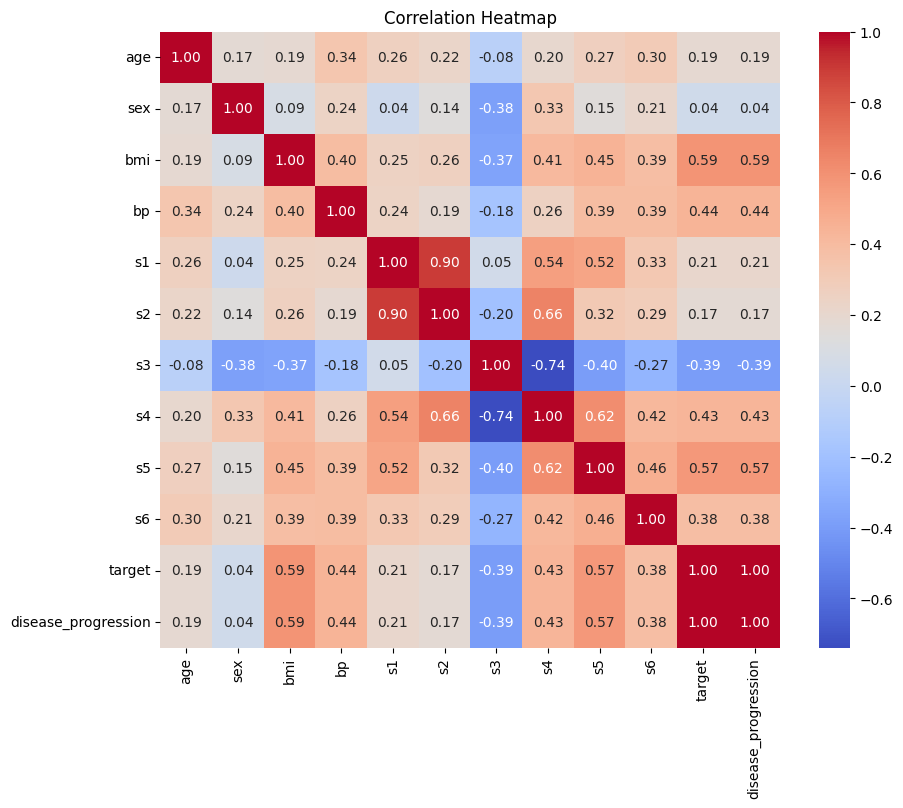


Top correlations with disease progression: 
 disease_progression    1.000000
target                 1.000000
bmi                    0.586450
s5                     0.565883
bp                     0.441482
s4                     0.430453
s6                     0.382483
s1                     0.212022
age                    0.187889
s2                     0.174054
sex                    0.043062
s3                    -0.394789
Name: disease_progression, dtype: float64


In [470]:
# Visualize distributions of all features
diabetes_df.hist(bins=20, figsize=(12, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Scatter plots of key features vs disease progression
key_features = ["bmi", "bp", "s5", "age"]  # commonly correlated features
plt.figure(figsize=(10, 8))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i + 1)
    plt.scatter(diabetes_df[feature], diabetes_df["disease_progression"], alpha=0.6, color="teal")
    plt.xlabel(feature)
    plt.ylabel("disease_progression")
    plt.title(f"{feature} vs Disease Progression")
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = diabetes_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Identify the top correlated features with target
correlations = corr_matrix["disease_progression"].sort_values(ascending=False)
print("\nTop correlations with disease progression: \n", correlations)


Missing values per column: 
 age                    0
sex                    0
bmi                    0
bp                     0
s1                     0
s2                     0
s3                     0
s4                     0
s5                     0
s6                     0
target                 0
disease_progression    0
dtype: int64

Number of duplicate rows: 0

Number of potential outlier points: 15


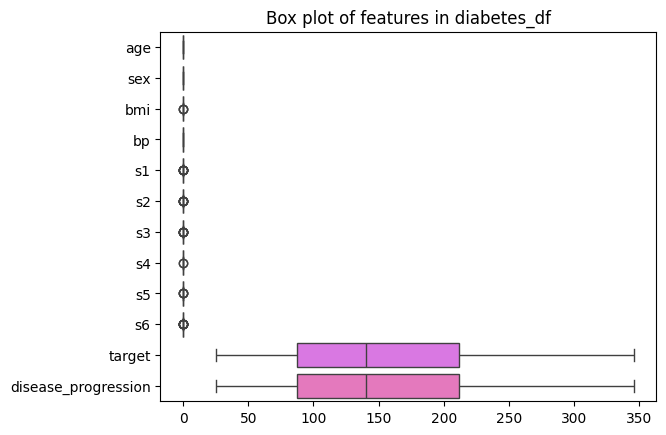

Shape before removing outliers: (442, 12)
Shape after removing outliers: (430, 12)

Data is clean. No missing values, no duplicates, outliers removed, and the dataset is already scaled.


In [471]:
# 4. Data Cleaning

# Check for missing values
missing_values = diabetes_df.isnull().sum()
print("Missing values per column: \n", missing_values)

# Check for duplicates
duplicates = diabetes_df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# Calculate z-scores for all features including target
z_scores = np.abs(zscore(diabetes_df))
# Identify rows where any feature has |z| > 3
outliers = np.where(z_scores > 3)
print("\nNumber of potential outlier points:", len(outliers[0]))

# Visualize outliers in diabetes dataset
sns.boxplot(data=diabetes_df, orient="h")
plt.title('Box plot of features in diabetes_df')
plt.show()

# Removing outliers
print("Shape before removing outliers:", diabetes_df.shape)
diabetes_df = diabetes_df[(z_scores < 3).all(axis=1)]
print("Shape after removing outliers:", diabetes_df.shape)

# Summary
print("\nData is clean. No missing values, no duplicates, outliers removed, and the dataset is already scaled.")

In [472]:
# 5. Split into train + temp (train 75%, temp 25%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# 75% train, 10% validation, 15% test
X_train_full, X_temp, y_train_full, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)
print("Train data length:", len(X_train_full))
print("Validation data length:", len(X_val))
print("Test data length:", len(X_test))

X_train shape: (331, 10)
X_val shape: (44, 10)
X_test shape: (67, 10)
y_train shape: (331,)
y_val shape: (44,)
y_test shape: (67,)
Train data length: 331
Validation data length: 44
Test data length: 67


#### Part 2: Univariate Polynomial Regression on BMI.

In [473]:
# Extract BMI feature
X_train_bmi = X_train[["bmi"]].values
X_val_bmi = X_val[["bmi"]].values
X_test_bmi = X_test[["bmi"]].values

# Initialize results list
results = []

# 6. Train polynomial regression models for degrees 0 to 5
for degree in range(6):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_bmi)
    X_val_poly = poly.transform(X_val_bmi)
    
    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train_full)
    
    # Predict on train and validation sets
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    # MAPE calculation (avoid division by zero)
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    val_mape = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
    
    # Store results
    results.append({
        "Degree": degree,
        "Train R2": train_r2,
        "Validation R2": val_r2,
        "Train MAE": train_mae,
        "Validation MAE": val_mae,
        "Train MAPE": train_mape,
        "Validation MAPE": val_mape
    })

# 7. Compare the models using the training and validation data
# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print("\nPolynomial Regression Results (Degrees 0-5): ")
display(results_df.head())


Polynomial Regression Results (Degrees 0-5): 


,Degree,Train R2,Validation R2,Train MAE,Validation MAE,Train MAPE,Validation MAPE
0,0,0.000000,-0.106957,66.201641,66.057059,62.826669,71.263880
1,1,0.349672,0.331264,52.287739,47.208472,48.362886,47.060009
2,2,0.350764,0.331631,52.207314,47.213700,48.298534,47.239667
3,3,0.350774,0.331638,52.198968,47.185414,48.280744,47.222673
4,4,0.353014,0.340758,52.092653,46.090118,48.053266,46.050330



Summary Table for Polynomial Regression (Degrees 0-5): 



,Degree,Train R2,Validation R2,Train MAE,Validation MAE,Train MAPE,Validation MAPE
0,0,0.000,-0.107,66.20,66.06,62.83,71.26
1,1,0.350,0.331,52.29,47.21,48.36,47.06
2,2,0.351,0.332,52.21,47.21,48.30,47.24
3,3,0.351,0.332,52.20,47.19,48.28,47.22
4,4,0.353,0.341,52.09,46.09,48.05,46.05


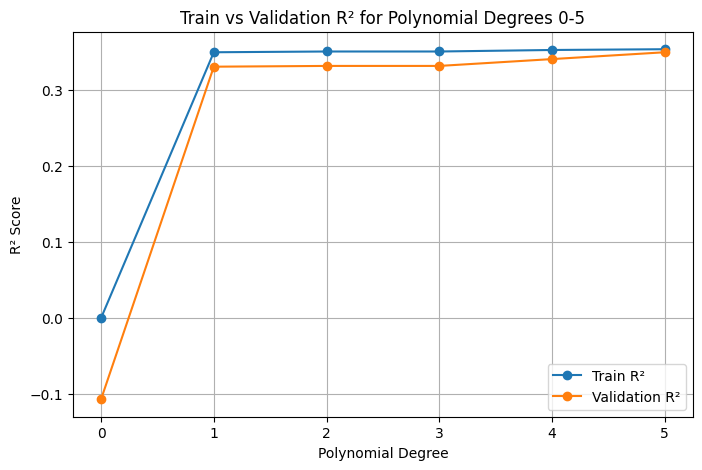

In [474]:

# Create a clean summary table
summary_table = results_df[[
    "Degree",
    "Train R2", "Validation R2",
    "Train MAE", "Validation MAE",
    "Train MAPE", "Validation MAPE"
]]

# Round metrics for better readability
summary_table = summary_table.round({
    "Train R2": 3,
    "Validation R2": 3,
    "Train MAE": 2,
    "Validation MAE": 2,
    "Train MAPE": 2,
    "Validation MAPE": 2
})

# Display the table
print("\nSummary Table for Polynomial Regression (Degrees 0-5): \n")
# Convert results to a DataFrame for easy viewing
summary_table_df = pd.DataFrame(summary_table)
display(summary_table_df.head())

plt.figure(figsize=(8,5))
plt.plot(summary_table["Degree"], summary_table["Train R2"], marker='o', label="Train R²")
plt.plot(summary_table["Degree"], summary_table["Validation R2"], marker='o', label="Validation R²")
plt.xlabel("Polynomial Degree")
plt.ylabel("R² Score")
plt.title("Train vs Validation R² for Polynomial Degrees 0-5")
plt.legend()
plt.grid(True)
plt.show()


In [475]:
# 8. Identify the Best Model (based on Validation Metrics)

# Choose the model with the highest Validation R²
best_idx = summary_table["Validation R2"].idxmax()
best_model_info = summary_table.loc[best_idx]

print("Best Polynomial Model Based on Validation R²: \n", best_model_info)

# Extract best degree
best_degree = best_model_info["Degree"]
print("\nBest Polynomial Degree:", best_degree)

# Prepare polynomial features
poly = PolynomialFeatures(degree=int(best_degree))
X_train_poly = poly.fit_transform(X_train_bmi)
X_val_poly = poly.transform(X_val_bmi)  # validation

# Train Linear Regression model
best_model = LinearRegression()
best_model.fit(X_train_poly, y_train)

print("\nBest model is trained and ready for evaluation on test set.")


Best Polynomial Model Based on Validation R²: 
 Degree              5.000
Train R2            0.354
Validation R2       0.350
Train MAE          52.060
Validation MAE     45.460
Train MAPE         48.000
Validation MAPE    45.180
Name: 5, dtype: float64

Best Polynomial Degree: 5.0

Best model is trained and ready for evaluation on test set.


In [476]:
# 9. Run the chosen model on the test set and provide results (R-Squared, MAPE, MAE)
# Transform the test BMI feature using the polynomial transformer
X_test_poly = poly.transform(X_test_bmi)

# Make predictions on the test set
y_test_pred = best_model.predict(X_test_poly)

test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
# MAPE calculation (avoid division by zero)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print results
print("Test Set Evaluation for Best Polynomial Model:")
print(f"R² Score: {test_r2:.3f}")
print(f"MAE: {test_mae:.2f}")
print(f"MAPE: {test_mape:.2f}%")

Test Set Evaluation for Best Polynomial Model:
R² Score: 0.267
MAE: 51.75
MAPE: 43.03%


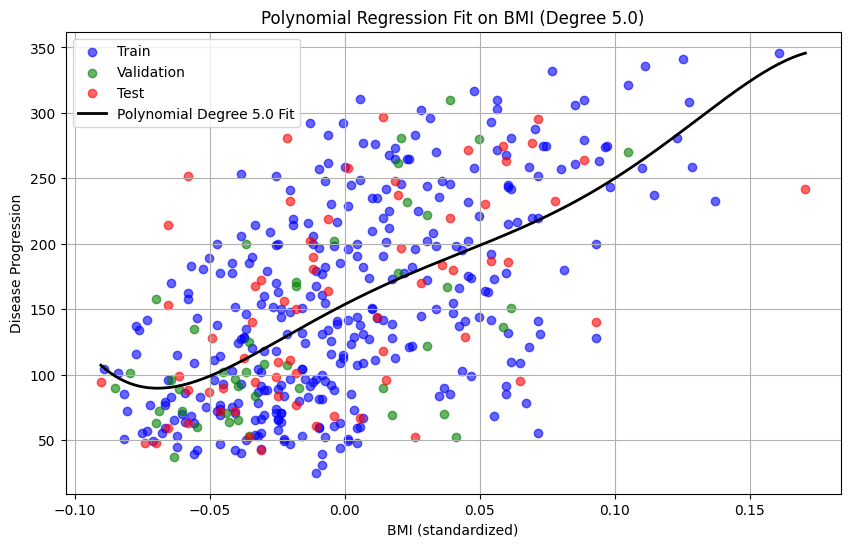

In [477]:
# Create a range of BMI values for plotting the polynomial curve
bmi_range = np.linspace(X["bmi"].min(), X["bmi"].max(), 300).reshape(-1, 1)
bmi_range_poly = poly.transform(bmi_range)

# Predict disease progression over the BMI range
y_range_pred = best_model.predict(bmi_range_poly)

# 10. Plot a graph of the train, validation, and test data points, and the fit of the chosen model over each of them

# Plot the data points and the fitted curve
plt.figure(figsize=(10, 6))

# Scatter plots for train, validation, and test
plt.scatter(X_train_bmi, y_train, color="blue", alpha=0.6, label="Train")
plt.scatter(X_val_bmi, y_val, color="green", alpha=0.6, label="Validation")
plt.scatter(X_test_bmi, y_test, color="red", alpha=0.6, label="Test")

# Plot the fitted polynomial curve
plt.plot(bmi_range, y_range_pred, color="black", linewidth=2, label=f"Polynomial Degree {best_degree} Fit")

# Labels and title
plt.xlabel("BMI (standardized)")
plt.ylabel("Disease Progression")
plt.title(f"Polynomial Regression Fit on BMI (Degree {best_degree})")
plt.legend()
plt.grid(True)
plt.show()

In [478]:
# 11. Write down the equation of the best model (with a two-decimal-digit precision)

# Get model coefficients and intercept
coefficients = best_model.coef_
intercept = best_model.intercept_

# Round coefficients and intercept to 2 decimal places
coefficients_rounded = np.round(coefficients, 2)
intercept_rounded = round(intercept, 2)

# Get feature names for polynomial terms
feature_names = poly.get_feature_names_out(["bmi"])

# Construct the equation string
equation_terms = [f"{coeff}*{name}" for coeff, name in zip(coefficients_rounded, feature_names)]
equation = " + ".join(equation_terms)
equation = f"disease_progression = {intercept_rounded} + {equation}"

# Print the final equation
print("Equation of the Best Polynomial Model: \n", equation)

Equation of the Best Polynomial Model: 
 disease_progression = 153.65 + 0.0*1 + 1059.89*bmi + -3824.15*bmi^2 + -16770.23*bmi^3 + 753722.52*bmi^4 + -2993716.57*bmi^5


In [479]:
# 12. Calculate the expected diabetes progression for a BMI value of your choice using `model.predict()

# Choose a BMI value (example: 0.03, since features are standardized)
chosen_bmi = 0.03  # replace with any standardized BMI value

# Transform BMI value using the polynomial transformer
bmi_poly = poly.transform([[chosen_bmi]])

# Predict disease progression using the best model
predicted_progression = best_model.predict(bmi_poly)[0]

# Print the result
print(f"Predicted disease progression for BMI = {chosen_bmi}: {predicted_progression:.2f}")

Predicted disease progression for BMI = 0.03: 182.09


In [480]:
# 13. How many trainable parameters are we fitting for each of the models? Explain these values

print("Trainable Parameters for Polynomial Regression Models (BMI Only):\n")

for degree in range(6):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train_bmi)
    
    # Number of trainable parameters = number of features including intercept
    n_parameters = X_poly.shape[1]
    
    # List the feature names
    feature_names = poly.get_feature_names_out(["bmi"])
    
    print(f"Degree {degree}:")
    print(f"  Number of trainable parameters: {n_parameters}")
    print(f"  Polynomial terms: {list(feature_names)}\n")

Trainable Parameters for Polynomial Regression Models (BMI Only):

Degree 0:
  Number of trainable parameters: 1
  Polynomial terms: ['1']

Degree 1:
  Number of trainable parameters: 2
  Polynomial terms: ['1', 'bmi']

Degree 2:
  Number of trainable parameters: 3
  Polynomial terms: ['1', 'bmi', 'bmi^2']

Degree 3:
  Number of trainable parameters: 4
  Polynomial terms: ['1', 'bmi', 'bmi^2', 'bmi^3']

Degree 4:
  Number of trainable parameters: 5
  Polynomial terms: ['1', 'bmi', 'bmi^2', 'bmi^3', 'bmi^4']

Degree 5:
  Number of trainable parameters: 6
  Polynomial terms: ['1', 'bmi', 'bmi^2', 'bmi^3', 'bmi^4', 'bmi^5']



In [481]:
#14. Provide a conclusion section. In particular, conduct a thorough analysis of where the model fails, 
# and include a brief section in the conclusions that describes the model's limitations. 
# This should be in addition to summarizing its performance.

# Conclusion and Analysis

print("Conclusion and Analysis:\n")

# Summary of Performance
print(f"- The best univariate polynomial model uses BMI with degree {best_degree}.")
print(f"- Validation R²: {best_model_info['Validation R2']:.3f}")
print(f"- Test R²: {test_r2:.3f}")
print(f"- Test MAE: {test_mae:.2f}")
print(f"- Test MAPE: {test_mape:.2f}%\n")

# Where the model fails
print("Performance Analysis:")
print("- The model captures general trends between BMI and disease progression.")
print("- However, it may underperform on patients whose disease progression is influenced by other features.")
print("- High-degree polynomials may overfit training data but fail to generalize, while low-degree polynomials may underfit.\n")

# Limitations
print("Model Limitations:")
print("- Only one feature (BMI) is used; other important features (blood pressure, serum measures) are ignored.")
print("- Univariate approach cannot capture complex interactions between features.")
print("- Small dataset size (~442 patients) limits the model's ability to generalize.")
print("- Outliers, though few, may still influence polynomial fit, especially at higher degrees.")
print("- Predictions are quantitative risk scores, but clinical decisions require additional context from physicians.\n")

# Future Improvements
print("Future Recommendations:")
print("- Use multivariate polynomial regression to include more features.")
print("- Explore tree-based models and kNN for capturing non-linear interactions.")
print("- Perform cross-validation and hyperparameter tuning for more robust model selection.")
print("- Consider feature selection or dimensionality reduction to improve interpretability and performance.")


Conclusion and Analysis:

- The best univariate polynomial model uses BMI with degree 5.0.
- Validation R²: 0.350
- Test R²: 0.267
- Test MAE: 51.75
- Test MAPE: 43.03%

Performance Analysis:
- The model captures general trends between BMI and disease progression.
- However, it may underperform on patients whose disease progression is influenced by other features.
- High-degree polynomials may overfit training data but fail to generalize, while low-degree polynomials may underfit.

Model Limitations:
- Only one feature (BMI) is used; other important features (blood pressure, serum measures) are ignored.
- Univariate approach cannot capture complex interactions between features.
- Small dataset size (~442 patients) limits the model's ability to generalize.
- Outliers, though few, may still influence polynomial fit, especially at higher degrees.
- Predictions are quantitative risk scores, but clinical decisions require additional context from physicians.

Future Recommendations:
- Use mu

#### Part 3: Multivariate Polynomial, Decision Trees, and kNN models

In [482]:
# use all features in the dataset, or drop some features at your discretion based on the EDA.
# Repeat the steps in part 2 for the following models:
#     1. Two polynomial models (degrees >1, of your choice)
#     2. Two decision trees (e.g., consider changing the `max_depth` hyperparameter)
#     3. Two kNNs
#     4. Two Logistic Regression models

# Select features (all features)
X_train_multi = X_train.values
X_val_multi = X_val.values
X_test_multi = X_test.values

# Train two polynomial models (degree 2 and degree 3)
degrees = [2, 3]
poly_results = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_multi)
    X_val_poly = poly.transform(X_val_multi)
    X_test_poly = poly.transform(X_test_multi)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on train, validation, and test
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    val_mape = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    poly_results.append({
        "Degree": degree,
        "Train R2": train_r2,
        "Validation R2": val_r2,
        "Test R2": test_r2,
        "Train MAE": train_mae,
        "Validation MAE": val_mae,
        "Test MAE": test_mae,
        "Train MAPE": train_mape,
        "Validation MAPE": val_mape,
        "Test MAPE": test_mape
    })

# Convert results to DataFrame
poly_results_df = pd.DataFrame(poly_results)
print("\nMultivariate Polynomial Regression Results: \n", poly_results_df.round(3))


Multivariate Polynomial Regression Results: 
    Degree  Train R2  Validation R2  Test R2  Train MAE  Validation MAE  \
0       2     0.605          0.426    0.399     39.216          41.802   
1       3     0.910        -43.280  -65.832     15.651         241.215   

   Test MAE  Train MAPE  Validation MAPE  Test MAPE  
0    45.493      34.606           42.277     37.949  
1   243.156      14.357          231.212    213.852  



Decision Tree Regression Results: 
    Max Depth  Train R2  Validation R2  Test R2  Train MAE  Validation MAE  \
0          3     0.510          0.198    0.438     44.260          48.126   
1          5     0.687          0.094    0.366     33.527          49.645   

   Test MAE  Train MAPE  Validation MAPE  Test MAPE  
0    46.115      38.867           47.673     40.176  
1    47.737      29.974           48.162     39.530  


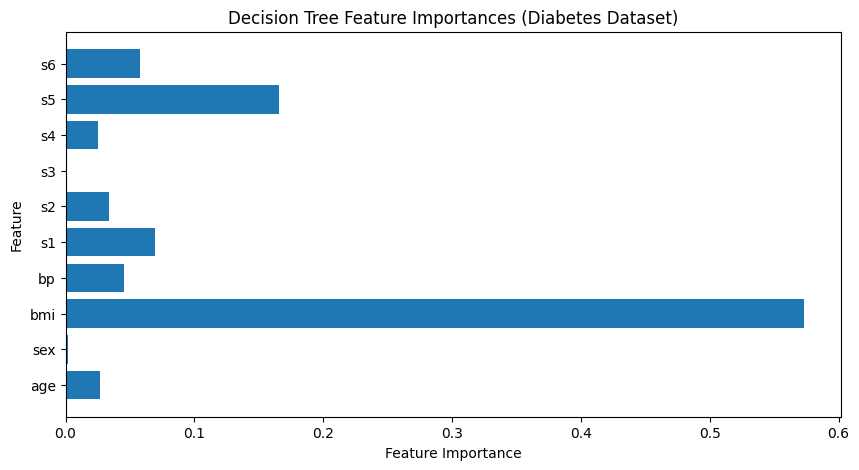

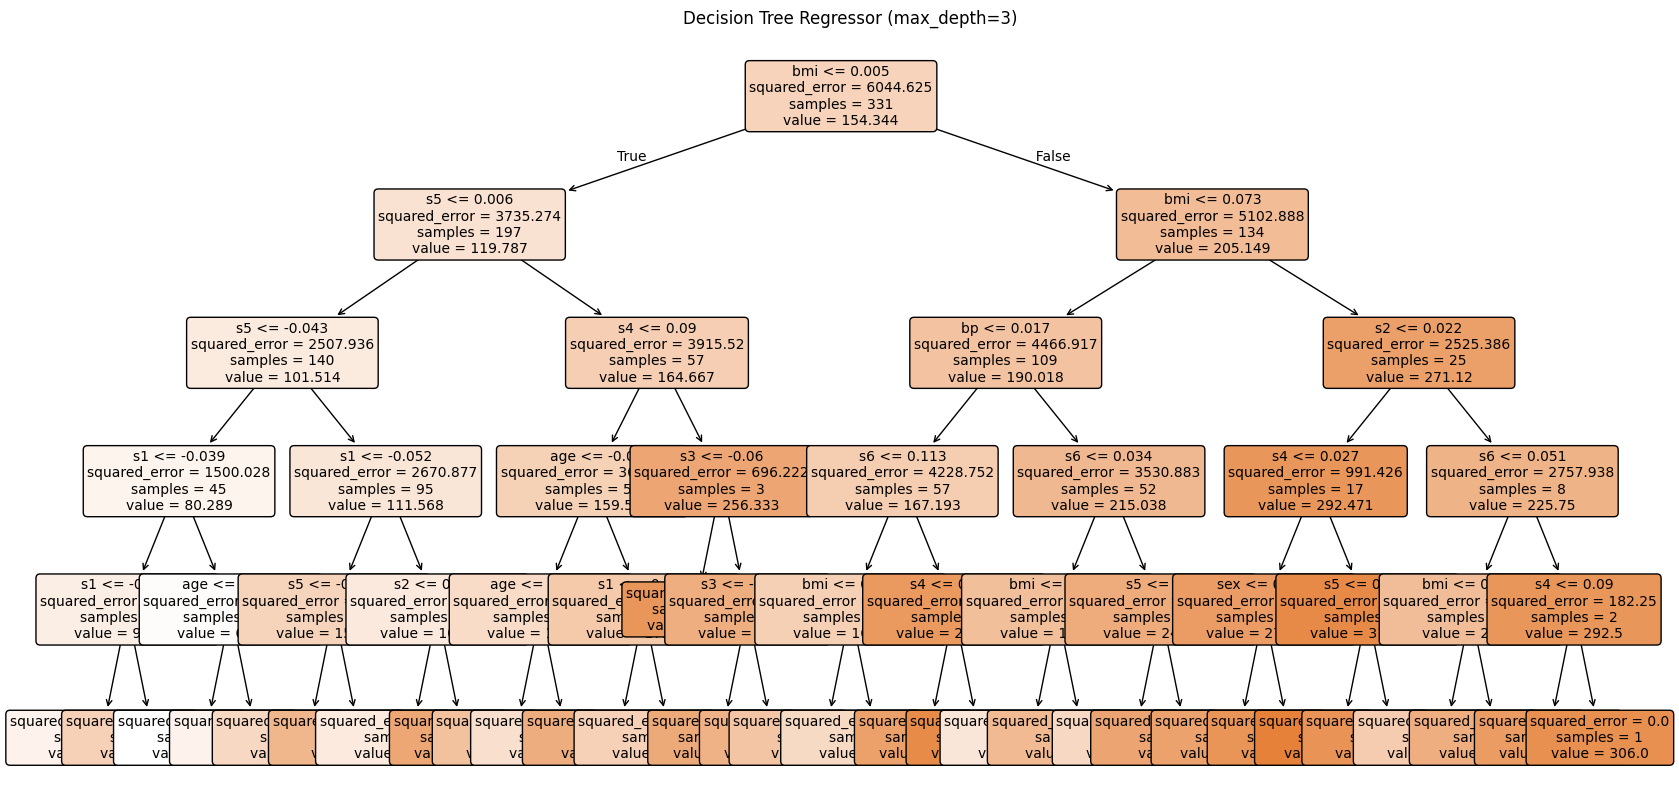

In [483]:
# Decision Tree Regressors

# Train two Decision Tree models with different max_depth
tree_depths = [3, 5]
tree_results = []

for depth in tree_depths:
    tree_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_model.fit(X_train_multi, y_train)
    
    y_train_pred = tree_model.predict(X_train_multi)
    y_val_pred = tree_model.predict(X_val_multi)
    y_test_pred = tree_model.predict(X_test_multi)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    val_mape = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    tree_results.append({
        "Max Depth": depth,
        "Train R2": train_r2,
        "Validation R2": val_r2,
        "Test R2": test_r2,
        "Train MAE": train_mae,
        "Validation MAE": val_mae,
        "Test MAE": test_mae,
        "Train MAPE": train_mape,
        "Validation MAPE": val_mape,
        "Test MAPE": test_mape
    })

# Convert results to DataFrame
tree_results_df = pd.DataFrame(tree_results)
print("\nDecision Tree Regression Results: \n", tree_results_df.round(3))

# Feature importances
plt.figure(figsize=(10,5))
plt.barh(X.columns, tree_model.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importances (Diabetes Dataset)")
plt.show()

# Tree visualization
plt.figure(figsize=(20,10))
plot_tree(
    tree_model,
    feature_names=X.columns,
    filled=True,          # color nodes by output value
    rounded=True,         # rounded boxes
    fontsize=10
)
plt.title("Decision Tree Regressor (max_depth=3)")
plt.show()

In [484]:
# kNN Regressors

# Train two kNN models with different n_neighbors
knn_neighbors = [3, 7]
knn_results = []

for k in knn_neighbors:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_multi, y_train)
    
    y_train_pred = knn_model.predict(X_train_multi)
    y_val_pred = knn_model.predict(X_val_multi)
    y_test_pred = knn_model.predict(X_test_multi)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    val_mape = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    knn_results.append({
        "n_neighbors": k,
        "Train R2": train_r2,
        "Validation R2": val_r2,
        "Test R2": test_r2,
        "Train MAE": train_mae,
        "Validation MAE": val_mae,
        "Test MAE": test_mae,
        "Train MAPE": train_mape,
        "Validation MAPE": val_mape,
        "Test MAPE": test_mape
    })

# Convert results to DataFrame
knn_results_df = pd.DataFrame(knn_results)
print("\nkNN Regression Results: \n", knn_results_df.round(3))


kNN Regression Results: 
    n_neighbors  Train R2  Validation R2  Test R2  Train MAE  Validation MAE  \
0            3     0.629          0.214    0.441     37.138          45.795   
1            7     0.523          0.359    0.478     43.204          42.127   

   Test MAE  Train MAPE  Validation MAPE  Test MAPE  
0    43.846      31.597           44.242     35.874  
1    41.518      37.103           39.591     35.230  


In [485]:
# Final Comparison Table and Insights

# Add a column to identify model type
poly_results_df["Model"] = ["Multivariate Poly Degree " + str(d) for d in poly_results_df["Degree"]]
tree_results_df["Model"] = ["Decision Tree Depth " + str(d) for d in tree_results_df["Max Depth"]]
knn_results_df["Model"] = ["kNN k=" + str(k) for k in knn_results_df["n_neighbors"]]

# Select relevant columns and rename for consistency
poly_df = poly_results_df[["Model", "Train R2", "Validation R2", "Test R2",
                           "Train MAE", "Validation MAE", "Test MAE",
                           "Train MAPE", "Validation MAPE", "Test MAPE"]]

tree_df = tree_results_df[["Model", "Train R2", "Validation R2", "Test R2",
                           "Train MAE", "Validation MAE", "Test MAE",
                           "Train MAPE", "Validation MAPE", "Test MAPE"]]

knn_df = knn_results_df[["Model", "Train R2", "Validation R2", "Test R2",
                         "Train MAE", "Validation MAE", "Test MAE",
                         "Train MAPE", "Validation MAPE", "Test MAPE"]]

# Concatenate all results into one final summary table
final_comparison_df = pd.concat([poly_df, tree_df, knn_df], ignore_index=True)

# Round metrics for readability
final_comparison_df.iloc[:, 1:] = final_comparison_df.iloc[:, 1:].round(3)

# Display the final comparison table
print("Final Comparison of All Part 3 Models:\n", final_comparison_df)

# Insights
print("\nInsights:")
print("- Models with higher validation R² are generally better at predicting unseen data.")
print("- Decision Trees may overfit at higher depth; check validation metrics.")
print("- kNN models depend heavily on 'k'; smaller k can overfit while larger k smooths predictions.")
print("- Multivariate polynomial models capture feature interactions but may overfit if degree is high.")
print("- Choose model balancing high validation R² and low MAE/MAPE for generalization.")


Final Comparison of All Part 3 Models:
                         Model  Train R2  Validation R2  Test R2  Train MAE  \
0  Multivariate Poly Degree 2     0.605          0.426    0.399     39.216   
1  Multivariate Poly Degree 3     0.910        -43.280  -65.832     15.651   
2       Decision Tree Depth 3     0.510          0.198    0.438     44.260   
3       Decision Tree Depth 5     0.687          0.094    0.366     33.527   
4                     kNN k=3     0.629          0.214    0.441     37.138   
5                     kNN k=7     0.523          0.359    0.478     43.204   

   Validation MAE  Test MAE  Train MAPE  Validation MAPE  Test MAPE  
0          41.802    45.493      34.606           42.277     37.949  
1         241.215   243.156      14.357          231.212    213.852  
2          48.126    46.115      38.867           47.673     40.176  
3          49.645    47.737      29.974           48.162     39.530  
4          45.795    43.846      31.597           44.242     35